In [19]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv("train.csv")
data = np.array(data)

In [22]:
m , n = data.shape
np.random.shuffle(data)
    
np.random.shuffle(data)

data_dev = data[0:1000].T

y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T

y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255
_, m_train = X_train.shape

In [23]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

    
def relu(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A 
    

def forward_pro(W1,b1,W2,b2, X):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def derivative_relu(Z):
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * relu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2 

In [24]:
def get_preds(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X,Y, iterations, alpha):
    W1,b1, W2,b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_pro(W1,b1,W2,b2,X)
        dW1 , db1, dW2, db2 = back_prop (Z1, A1, Z2, A2, W1 ,W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_preds(A2), Y))
    return W1,b1,W2,b2

In [26]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 500, 0.10)

Iteration:  0
[5 7 7 ... 7 5 5] [5 9 8 ... 0 5 7]
Accuracy:  0.08285365853658537
Iteration:  50
[5 7 7 ... 7 5 7] [5 9 8 ... 0 5 7]
Accuracy:  0.18326829268292683
Iteration:  100
[5 7 8 ... 0 1 4] [5 9 8 ... 0 5 7]
Accuracy:  0.4397317073170732
Iteration:  150
[5 7 8 ... 6 5 7] [5 9 8 ... 0 5 7]
Accuracy:  0.6497073170731708
Iteration:  200
[5 9 8 ... 6 5 7] [5 9 8 ... 0 5 7]
Accuracy:  0.7420487804878049
Iteration:  250
[5 9 8 ... 0 5 7] [5 9 8 ... 0 5 7]
Accuracy:  0.7873170731707317
Iteration:  300
[5 9 8 ... 0 5 7] [5 9 8 ... 0 5 7]
Accuracy:  0.8160243902439024
Iteration:  350
[5 9 8 ... 0 5 7] [5 9 8 ... 0 5 7]
Accuracy:  0.8368292682926829
Iteration:  400
[5 9 8 ... 0 5 7] [5 9 8 ... 0 5 7]
Accuracy:  0.8513414634146341
Iteration:  450
[5 9 8 ... 0 5 7] [5 9 8 ... 0 5 7]
Accuracy:  0.8599756097560975


In [27]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_pro(W1, b1, W2, b2, X)
    predictions = get_preds(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


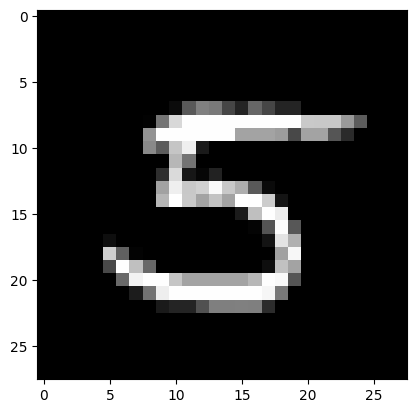

Prediction:  [9]
Label:  9


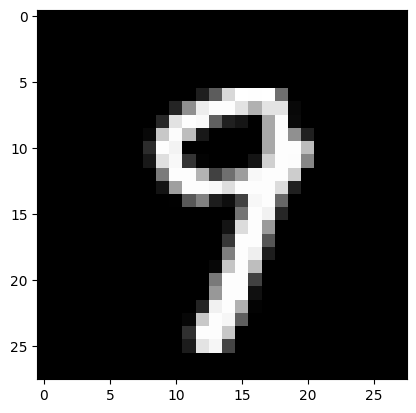

Prediction:  [8]
Label:  8


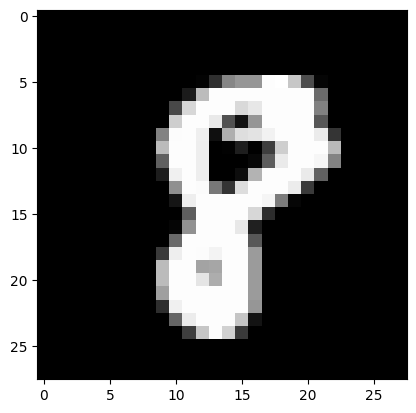

Prediction:  [9]
Label:  8


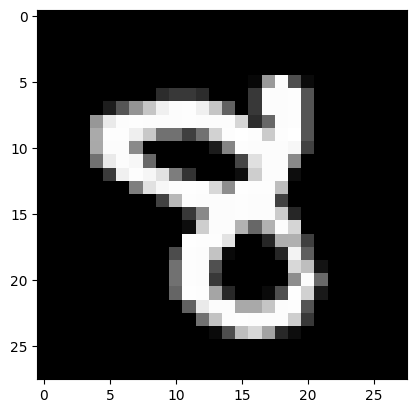

In [28]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)